In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('pokemon_data.csv')

In [4]:
df.head()

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary


In [5]:
df['Liczba liter w nazwie']=df['name'].apply(lambda x: len(x.replace(' ', '')))
df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Liczba liter w nazwie
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,9
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,7
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,8
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,10
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,10
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,11
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,9
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,9


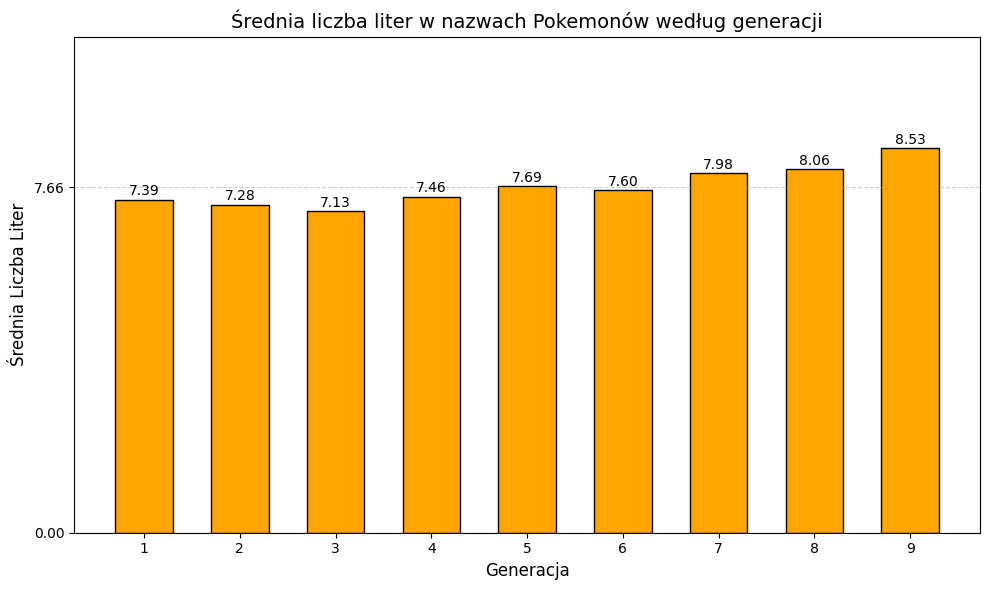

In [17]:
avg_letters = df.groupby('generation')['Liczba liter w nazwie'].mean().reset_index()
avg=df['Liczba liter w nazwie'].mean()

# 2. Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
# Zamiana numerów generacji na stringi, aby były traktowane jako kategorie na osi X
plt.bar(avg_letters['generation'].astype(str), avg_letters['Liczba liter w nazwie'], color='orange', edgecolor='black', width=0.6)


plt.title('Średnia liczba liter w nazwach Pokemonów według generacji', fontsize=14)
plt.xlabel('Generacja', fontsize=12)
plt.ylabel('Średnia Liczba Liter', fontsize=12)
plt.xticks(avg_letters['generation'].astype(str))
plt.yticks([0,avg])
plt.ylim(0,11)
plt.grid(axis='y',linestyle='--', alpha=0.6)

#wartości na słupkach
for i, row in avg_letters.iterrows():
    plt.text(i, row['Liczba liter w nazwie'] + 0.1, f"{row['Liczba liter w nazwie']:.2f}", ha='center')

plt.tight_layout()

#plt.savefig('srednia_liter_generacja.png')


# DODAĆ MIN I MAX LITER, MOŻE ROZKŁAD CAŁKOŚCI GAUSSA - NA CZTERECH OKIENKACH WSZYSTKO